In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
from numpy import log
from statsmodels.graphics.tsaplots import plot_acf
import warnings

<ipython-input-126-0c351c8e4dd2>:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [ ]:
airline=pd.read_excel("Airlines+Data.xlsx",parse_dates=True)

In [ ]:
airline

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
5,1995-06-01,135
6,1995-07-01,148
7,1995-08-01,148
8,1995-09-01,136
9,1995-10-01,119


## Visualisation of Data

<AxesSubplot:>

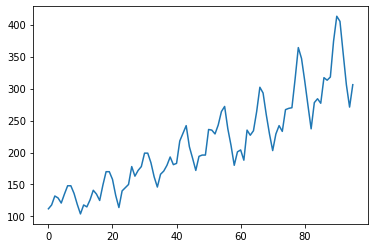

In [ ]:
airline['Passengers'].plot(kind='line')

<AxesSubplot:xlabel='Months', ylabel='Passengers'>

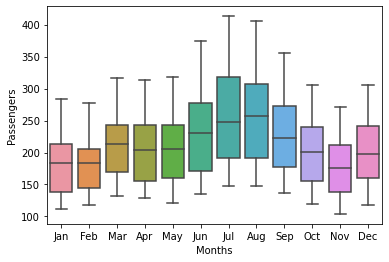

In [ ]:
airline["Date"]=pd.to_datetime(airline.Month,format="%b-%y")
airline["Months"]=airline.Date.dt.strftime("%b")
airline["Year"]=airline.Date.dt.strftime("%Y")

sns.boxplot(x="Months",y="Passengers",data=airline)


<AxesSubplot:ylabel='Density'>

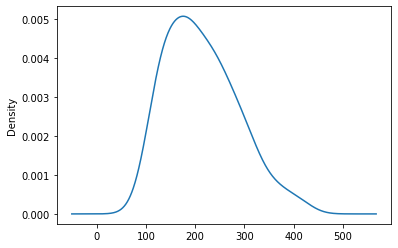

In [ ]:
airline['Passengers'].plot(kind='kde')

<AxesSubplot:>

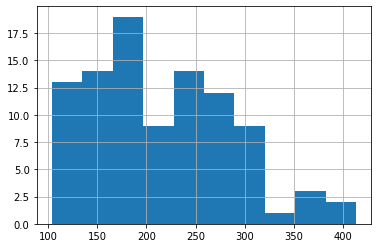

In [ ]:
airline['Passengers'].hist()

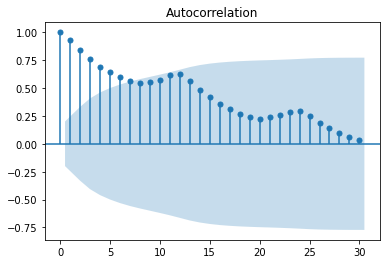

In [ ]:
plot_acf(airline['Passengers'],lags=30)
plt.show()

<AxesSubplot:xlabel='Year', ylabel='Passengers'>

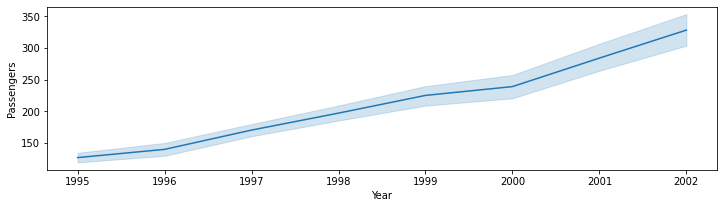

In [ ]:
plt.figure(figsize=(12,3))
sns.lineplot(x="Year",y="Passengers",data=airline)

## Resampling of Data

In [ ]:
airline.set_index(['Month'],inplace=True)

In [ ]:
#Upsample data to days
upsample= airline.resample('D').mean() 

In [ ]:
# Interpolate to fill NAN values
interpolated = upsample.interpolate(method='linear') 
print(interpolated.head(32))

            Passengers
Month                 
1995-01-01  112.000000
1995-01-02  112.193548
1995-01-03  112.387097
1995-01-04  112.580645
1995-01-05  112.774194
1995-01-06  112.967742
1995-01-07  113.161290
1995-01-08  113.354839
1995-01-09  113.548387
1995-01-10  113.741935
1995-01-11  113.935484
1995-01-12  114.129032
1995-01-13  114.322581
1995-01-14  114.516129
1995-01-15  114.709677
1995-01-16  114.903226
1995-01-17  115.096774
1995-01-18  115.290323
1995-01-19  115.483871
1995-01-20  115.677419
1995-01-21  115.870968
1995-01-22  116.064516
1995-01-23  116.258065
1995-01-24  116.451613
1995-01-25  116.645161
1995-01-26  116.838710
1995-01-27  117.032258
1995-01-28  117.225806
1995-01-29  117.419355
1995-01-30  117.612903
1995-01-31  117.806452
1995-02-01  118.000000


In [ ]:
data_up=interpolated.reset_index()

## EDA to add date,month,t values, tsquare values, log transform on interpolated data 

In [ ]:
data_up["Date"]=pd.to_datetime(data_up.Month,format="%b-%y")
data_up["Months"]=data_up.Date.dt.strftime("%b")
data_up["Year"]=data_up.Date.dt.strftime("%Y")
data_up

,Month,Passengers,Date,Months,Year
0,1995-01-01,112.000000,1995-01-01,Jan,1995
1,1995-01-02,112.193548,1995-01-02,Jan,1995
2,1995-01-03,112.387097,1995-01-03,Jan,1995
3,1995-01-04,112.580645,1995-01-04,Jan,1995
4,1995-01-05,112.774194,1995-01-05,Jan,1995
5,1995-01-06,112.967742,1995-01-06,Jan,1995
6,1995-01-07,113.161290,1995-01-07,Jan,1995
7,1995-01-08,113.354839,1995-01-08,Jan,1995
8,1995-01-09,113.548387,1995-01-09,Jan,1995
9,1995-01-10,113.741935,1995-01-10,Jan,1995


In [ ]:
data_up['t']= np.arange(1,2893)
data_up['t-square']= data_up['t']**2
data_up['log_transform']=np.log(data_up['Passengers'])
data_up

,Month,Passengers,Date,Months,Year,t,t-square,log_transform
0,1995-01-01,112.000000,1995-01-01,Jan,1995,1,1,4.718499
1,1995-01-02,112.193548,1995-01-02,Jan,1995,2,4,4.720225
2,1995-01-03,112.387097,1995-01-03,Jan,1995,3,9,4.721949
3,1995-01-04,112.580645,1995-01-04,Jan,1995,4,16,4.723670
4,1995-01-05,112.774194,1995-01-05,Jan,1995,5,25,4.725388
5,1995-01-06,112.967742,1995-01-06,Jan,1995,6,36,4.727102
6,1995-01-07,113.161290,1995-01-07,Jan,1995,7,49,4.728814
7,1995-01-08,113.354839,1995-01-08,Jan,1995,8,64,4.730523
8,1995-01-09,113.548387,1995-01-09,Jan,1995,9,81,4.732229
9,1995-01-10,113.741935,1995-01-10,Jan,1995,10,100,4.733932


In [ ]:
dummies=pd.DataFrame(pd.get_dummies(data_up['Months']))
data_up = pd.concat([data_up,dummies],axis = 1)


In [ ]:
pd.set_option('Display.max_rows',3000)

In [ ]:
data_up.head()

,Month,Passengers,Date,Months,Year,t,t-square,log_transform,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1995-01-01,112.000000,1995-01-01,Jan,1995,1,1,4.718499,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-01-02,112.193548,1995-01-02,Jan,1995,2,4,4.720225,0,0,0,0,1,0,0,0,0,0,0,0
2,1995-01-03,112.387097,1995-01-03,Jan,1995,3,9,4.721949,0,0,0,0,1,0,0,0,0,0,0,0
3,1995-01-04,112.580645,1995-01-04,Jan,1995,4,16,4.723670,0,0,0,0,1,0,0,0,0,0,0,0
4,1995-01-05,112.774194,1995-01-05,Jan,1995,5,25,4.725388,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
data=data_up.drop(['Month','Date','Months','Year'],axis=1)

In [ ]:
data.head()

,Passengers,t,t-square,log_transform,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,112.000000,1,1,4.718499,0,0,0,0,1,0,0,0,0,0,0,0
1,112.193548,2,4,4.720225,0,0,0,0,1,0,0,0,0,0,0,0
2,112.387097,3,9,4.721949,0,0,0,0,1,0,0,0,0,0,0,0
3,112.580645,4,16,4.723670,0,0,0,0,1,0,0,0,0,0,0,0
4,112.774194,5,25,4.725388,0,0,0,0,1,0,0,0,0,0,0,0


## Spliting Data into test and train

In [ ]:
train=data.head(2170)
test=data.tail(722)

In [ ]:
train.head()

,Passengers,t,t-square,log_transform,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,112.000000,1,1,4.718499,0,0,0,0,1,0,0,0,0,0,0,0
1,112.193548,2,4,4.720225,0,0,0,0,1,0,0,0,0,0,0,0
2,112.387097,3,9,4.721949,0,0,0,0,1,0,0,0,0,0,0,0
3,112.580645,4,16,4.723670,0,0,0,0,1,0,0,0,0,0,0,0
4,112.774194,5,25,4.725388,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
test.head()

,Passengers,t,t-square,log_transform,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
2170,232.774194,2171,4713241,5.450069,0,0,1,0,0,0,0,0,0,0,0,0
2171,233.193548,2172,4717584,5.451869,0,0,1,0,0,0,0,0,0,0,0,0
2172,233.612903,2173,4721929,5.453665,0,0,1,0,0,0,0,0,0,0,0,0
2173,234.032258,2174,4726276,5.455459,0,0,1,0,0,0,0,0,0,0,0,0
2174,234.451613,2175,4730625,5.457249,0,0,1,0,0,0,0,0,0,0,0,0


## For the above series data we can use the following models
### 1) Linear Model
### 2) Exponential Model
### 3) Quadratic Model
### 4) Addative Seasonality and Quadratic
### 5) Multiplicative Seasonality 
### 6) ARIMA 
#### We shall then compare the error and implement the model with least error value

In [ ]:
import statsmodels.formula.api as smf 
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [ ]:
# Linear
linear_model= smf.ols('Passengers~t',data=train).fit()
linear_pred= pd.Series(linear_model.predict(test['t']))
linear_rmse =np.sqrt(mean_squared_error(np.array(test['Passengers']),np.array(linear_pred)))
linear_rmse

50.17741391799506

In [ ]:
# Exponential
exp_model  =smf.ols("log_transform~t",data=train).fit()
exp_pred =pd.Series(exp_model.predict(test['t']))
exp_rmse =np.sqrt(mean_squared_error(np.array(test['Passengers']),np.array(exp_pred)))
exp_rmse

303.62155944522556

In [ ]:
# Quadratic
quad_model =smf.ols("Passengers~t+t-square",data=train).fit()
quad_pred = pd.Series(quad_model.predict(test[['t','t-square']]))
quad_rmse =np.sqrt(mean_squared_error(np.array(test['Passengers']),np.array(quad_pred)))
quad_rmse

50.17741391799506

In [ ]:
# Addative Seasonality and Quadratic
model_1= smf.ols("Passengers~t+t-square+Apr+Aug+Dec+Feb+Jan+Jul+Jun+Mar+May+Nov+Oct+Sep",data=train).fit()
model_1_pred= pd.Series(model_1.predict(test[['t','t-square','Apr','Aug','Dec','Feb','Jan','Jul','Jun','Mar','May','Nov','Oct','Sep']]))
model_1_rmse=np.sqrt(mean_squared_error(np.array(test['Passengers']),np.array(model_1_pred)))
model_1_rmse

36.59483201891579

In [ ]:
# Multiplicative Seasonality
Mul_sea = smf.ols('log_transform~Apr+Aug+Dec+Feb+Jan+Jul+Jun+Mar+May+Nov+Oct+Sep',data = train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(test[['Apr','Aug','Dec','Feb','Jan','Jul','Jun','Mar','May','Nov','Oct','Sep']]))
rmse_Mult_sea = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea 

131.57489062147124

## For ARIMA model we will use grid seach to find the best values of p and q

In [ ]:
A=train['Passengers'].values

In [ ]:
def evaluate_arima_model(X, arima_order):
# prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.50)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
# make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
# model_fit = model.fit(disp=0)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
# calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse  

In [ ]:
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(A, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))  

In [ ]:

# evaluate parameters
p_values = range(0, 2)
d_values = range(0, 2)
q_values = range(0, 2)
warnings.filterwarnings("ignore")
evaluate_models(A, p_values, d_values, q_values) 

ARIMA(0, 0, 0) RMSE=61.492
ARIMA(0, 0, 1) RMSE=30.757
ARIMA(0, 1, 0) RMSE=0.746
ARIMA(0, 1, 1) RMSE=0.436
ARIMA(1, 1, 0) RMSE=0.173
ARIMA(1, 1, 1) RMSE=0.173
Best ARIMA(1, 1, 1) RMSE=0.173


In [ ]:
table=[['Linear Model',linear_rmse],['Exponential Model',exp_rmse],['Quadratic Model',quad_rmse],['Addative Seasonality and Quadratic',model_1_rmse],['Multiplicative Seasonality',rmse_Mult_sea],['ARIMA',0.173]]
table_up=pd.DataFrame(table,columns=['Model','rmse']).sort_values('rmse')
table_up

,Model,rmse
5,ARIMA,0.173000
3,Addative Seasonality and Quadratic,36.594832
0,Linear Model,50.177414
2,Quadratic Model,50.177414
4,Multiplicative Seasonality,131.574891
1,Exponential Model,303.621559


### From all the Models ARIMA has the lowest RMSE value
### Hence fiting the Arima model on data
### First we shall fit it on train and then on test and train together 

In [ ]:
B=train['Passengers'].values
B=B.astype('float32')

In [ ]:
model= ARIMA(B,order=(1,1,1))
model_fit=model.fit()

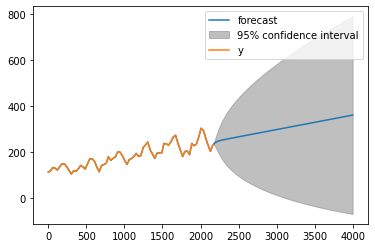

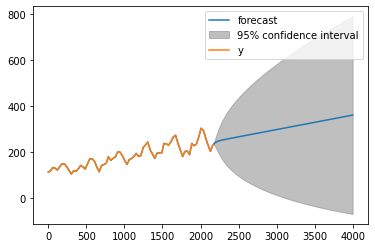

In [ ]:
forecast=model_fit.forecast(steps=100)[0]
model_fit.plot_predict(1,4000) 

### Fitting the model on both test and train together

In [ ]:
C= data['Passengers'].values
C=C.astype('float32')

In [ ]:
model_final=ARIMA(C,order=(1,1,1))
model_final_fit=model_final.fit()

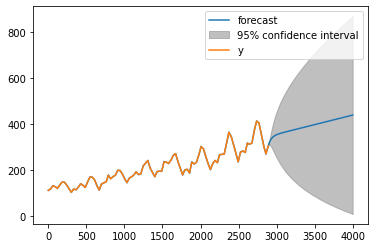

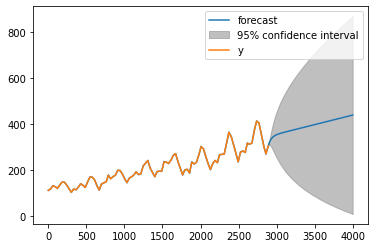

In [ ]:
forecast_1=model_final_fit.forecast(steps=100)[0]
model_final_fit.plot_predict(1,4000)

In [ ]:
forecast_1

array([307.13935853, 308.25177185, 309.33792721, 310.39849432,
       311.43412581, 312.44545767, 313.43310965, 314.39768573,
       315.33977444, 316.25994934])

## Conclusion:
1. Explore and Visualize the Series:
  * The data is univariate
  * The data when studied showed more passengers taravelled during the month of June, July, Aug, September.
  * The data shows upward trend
  * The data also has multiplicative seasonality.
2. Preprocessing of the data
  * For preprocessing we upsampled the data
  * Filled the NaN values with Interpolation method
  * Created dummies for the month variable(However, we could have created dummies for both day and year as well. This may increase the effeciency of the model)
  * We then transformed the data using t, tsquare, log transform as a part of model prep
  * We then partitioned the data into train,validate and future model
3. Model preperation:
  * We used 6 Model based forecasting methods.Linear Model, Exponential Model, Quadratic Model, Multiplicative Seasonality, Addative Seasonality and Quadratic, ARIMA	
  * Based on the RMSE value we choose the best model
  Model    	                          rmse
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++	
  ARIMA----------------->0.173000
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++	
  Addative Seasonality and Quadratic----------------->36.594832
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++	
  Linear Model----------------->50.177414
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++	
  Quadratic Model----------------->50.177414
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++	
  Multiplicative Seasonality----------------->131.574891
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
	 Exponential Model----------------->303.621559
  
  * As Arima had the least rmse value we choose arima for forecasting the data for passengers
  
## The above data is the predicted number of passengers for the next 10 days that is, from 2nd Dec 2012 to 11th Dec 2012